In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

1. EDA и Research анализ.


In [49]:
data = pd.read_csv('/kaggle/input/dataset/dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
data = data.drop(columns=["Unnamed: 0", "track_id"])

Удалим колонки "Unnamed: 0" и "track_id", так как они просто идентифицируют записи


In [52]:
data.duplicated().sum()


577

In [53]:
data = data.drop_duplicates()

Так как имеется 577 дубликатов, то удалим их.


In [54]:
data.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Получается, что у artists, 
album_namm, 
track_na аков есть по одному пус
тому значе
нию. Вм ихиси.



In [55]:
data[pd.isnull(data).any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [56]:
data = data.dropna()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


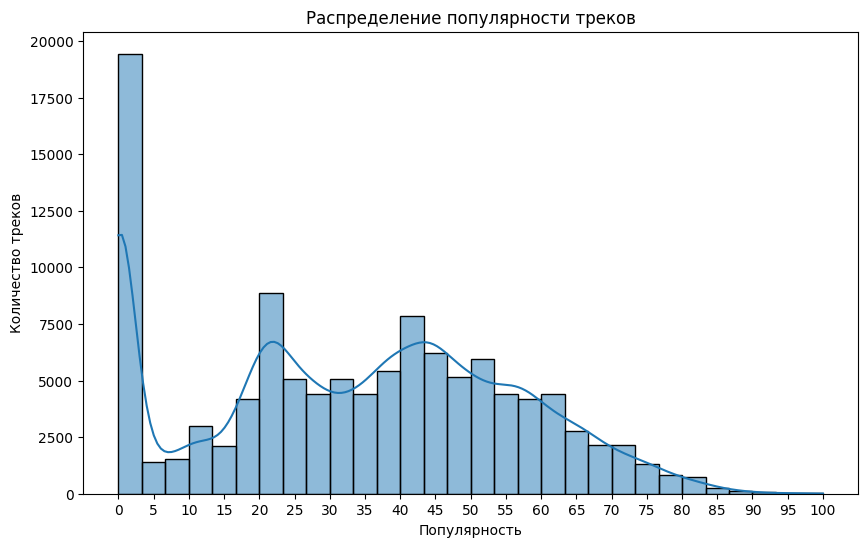

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True)
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.title('Распределение популярности треков')
plt.xticks(range(0, 101, 5))
plt.show()

In [58]:
data["duration_ms"] = data["duration_ms"].apply(lambda ms: round(ms / 1000 / 60, 1))
data = data.rename(columns={"duration_ms" : "duration_min"})

Вывод: По графику можно определить, что на Spotify есть много треков с нулевой популярностью

Переведём длительность треков в минуты, чтобы уменьшить масштаб и улучшить читаемость

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


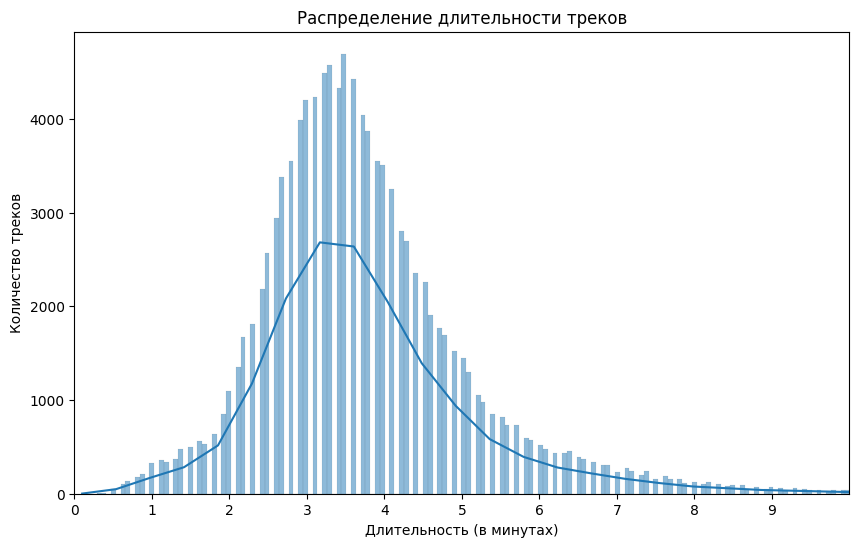

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_min'], kde=True)
plt.title('Распределение длительности треков')
plt.xlabel('Длительность (в минутах)')
plt.xlim(0, 10)  
plt.xticks(np.arange(0, 10, 1))  
plt.ylabel('Количество треков')
plt.show()

Вывод: средняя длительность треков от 3 до 4 минутью

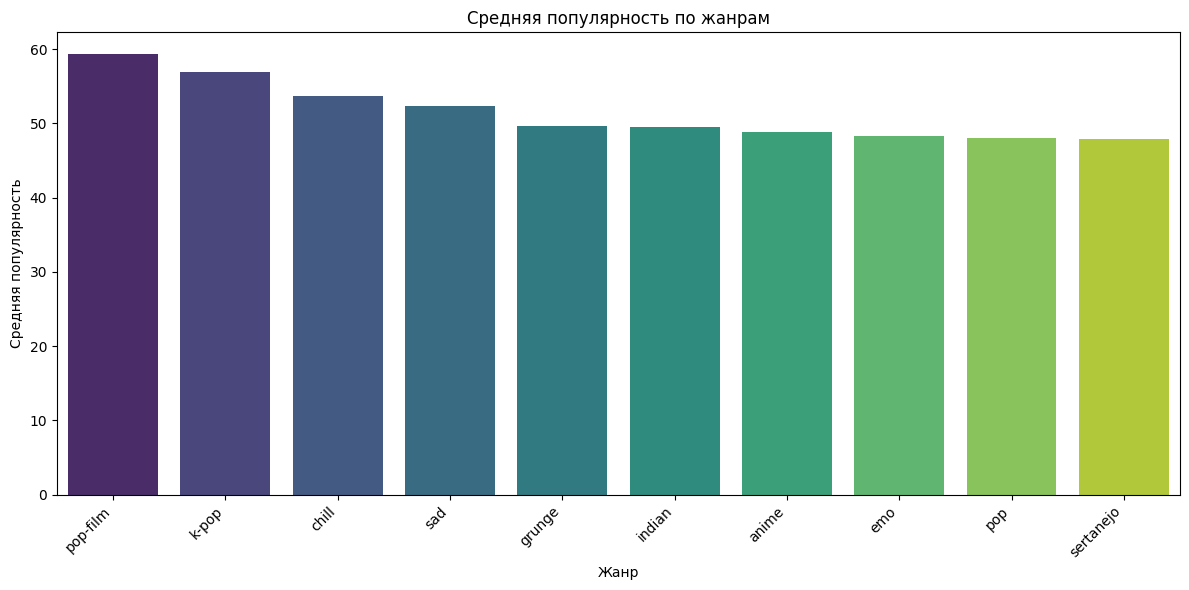

In [61]:
average_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

top_genres = average_popularity.head(10)  

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Средняя популярность по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Вывод: в четвёрку лучших жанров входят: pop-film, k-pop, chill, sad

Теперь выведем топ самых непопулярных жанров

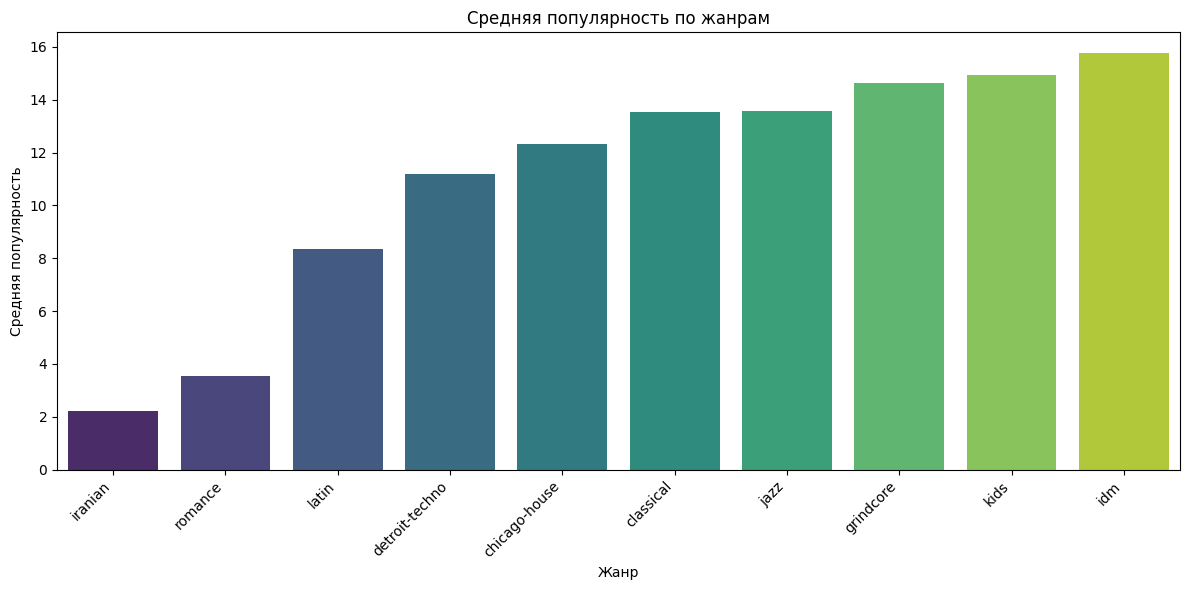

In [62]:
average_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=True)

top_genres = average_popularity.head(10)  

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Средняя популярность по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Вывод: Iranian и romance являются самыми непопулярными жанрамиью

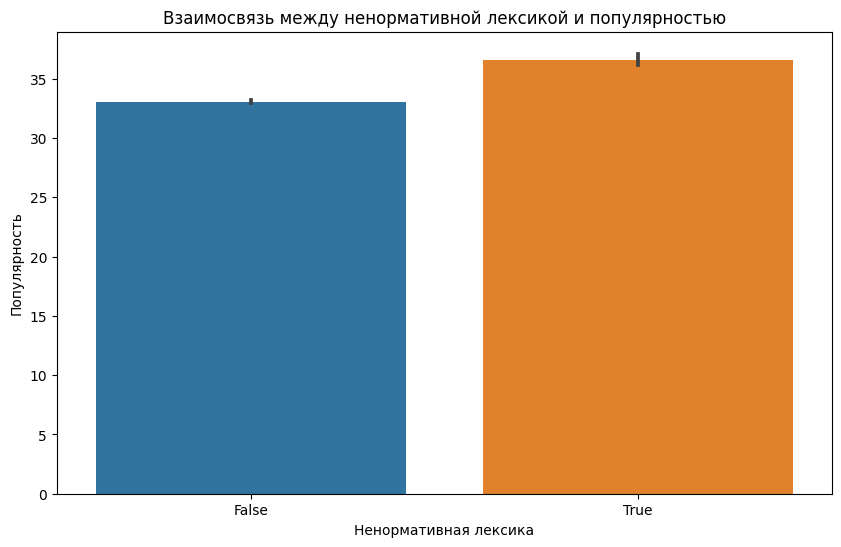

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='explicit', y='popularity', data=data)
plt.title('Взаимосвязь между ненормативной лексикой и популярностью')
plt.xlabel('Ненормативная лексика')
plt.ylabel('Популярность')
plt.show()

Вывод: Наличие ненормативной лексики особо не влияет на популярность

Выделим категориальные и числовые признаки

In [64]:
categorial_cols = data.select_dtypes(include=["object", "bool"]).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [65]:
for col in categorial_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [66]:
data.head()


,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,3.8,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,3287,14796,22528,55,2.5,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,12397,39162,60774,57,3.5,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,14839,8580,9580,71,3.4,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,5255,16899,25689,82,3.3,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


Определим корреляцию между признаками


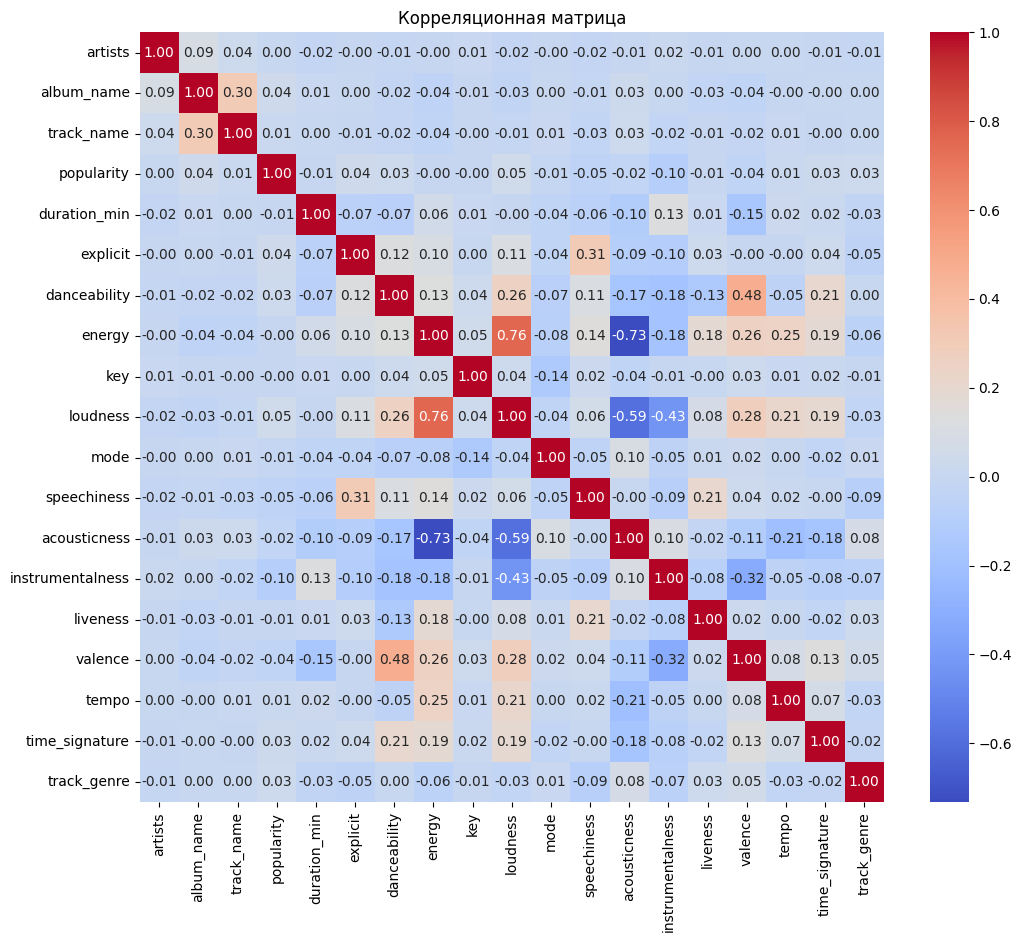

In [67]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Анализ корреляций выявил сильную положительную связь между громкостью (loudness) и энергичностью (energy) (r = 0.76). Сильная отрицательная корреляция наблюдается между акустичностью (acousticness) и энергичностью (r = -0.73). Корреляция между наличием речи (speechiness) и ненормативной лексикой (explicit) низкая (r = 0.31), что не подтверждает гипотезу о прямой связи. Кроме того, были выявлены и удалены аномалии в данных о громкости.

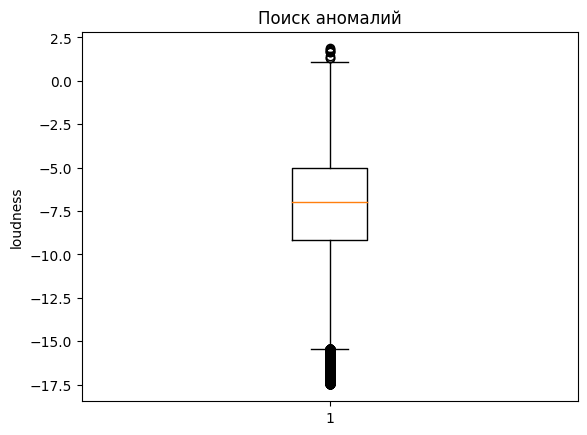

In [68]:
Q1 = data['loudness'].quantile(0.25)
Q3 = data['loudness'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Замена аномалий на медиану
median = data['loudness'].median()
data['loudness'] = data['loudness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data['loudness'])
plt.ylabel('loudness')
plt.title('Поиск аномалий')
plt.show()

Удаление аномалий у признака 'speechiness'

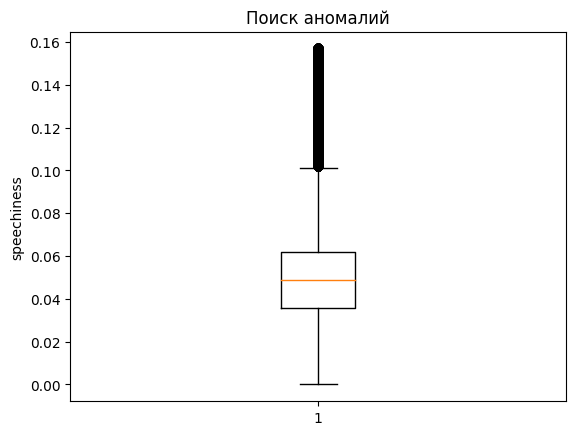

In [69]:
Q1 = data['speechiness'].quantile(0.25)
Q3 = data['speechiness'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = data['speechiness'].median()
data['speechiness'] = data['speechiness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data['speechiness'])
plt.ylabel('speechiness')
plt.title('Поиск аномалий')
plt.show()

удаление аномалий у признака 'instrumentalness'

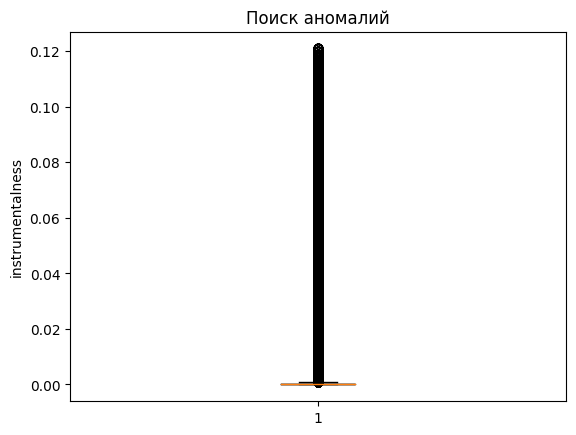

In [70]:
col = "instrumentalness"
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбор данных без выбросов
data_filtered = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.boxplot(data_filtered[col])
plt.ylabel('instrumentalness')
plt.title('Поиск аномалий')
plt.show()

График показывает значительное количество выбросов в признаке instrumentalness. Учитывая сходство instrumentalness с acousticness (оба отражают использование музыкальных инструментов) и низкую корреляцию instrumentalness с другими признаками, предлагается удалить этот признак из анализа.

In [71]:
data = data.drop('instrumentalness', axis=1)
numerical_features = numerical_features.drop('instrumentalness')

 удаление аномалий у признака 'liveness'

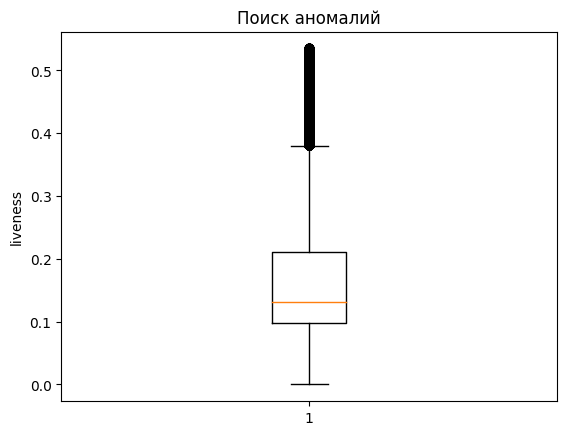

In [72]:
col = "liveness"
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = data['liveness'].median()
data['liveness'] = data['liveness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data[col])
plt.ylabel('liveness')
plt.title('Поиск аномалий')
plt.show()

удаление аномалий у признака 'tempo'

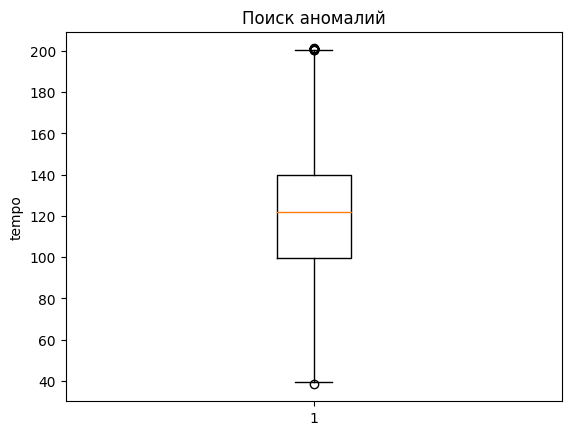

In [73]:
col = "tempo"
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = data['tempo'].median()
data['tempo'] = data['tempo'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data[col])
plt.ylabel('tempo')
plt.title('Поиск аномалий')
plt.show()

**2. Feature Engineering, Feature Importances и простая модель**

In [74]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
correlation = data.corr()
correlation_target = correlation['popularity'].sort_values(ascending=False)
correlation_target

Признаки artists, energy, и key слабо коррелируют с популярностью треков. Поскольку key не является уникальным идентификатором, energy имеет сильную корреляцию с другими признаками (loudness, tempo, danceability), а известность исполнителя не гарантирует успех трека, эти признаки предлагается исключить из датасета.

Посмотрим корелляцию и приведем числовые признаки к единому масштабу



In [76]:
data = data.drop(columns=["artists", "energy", "key"])

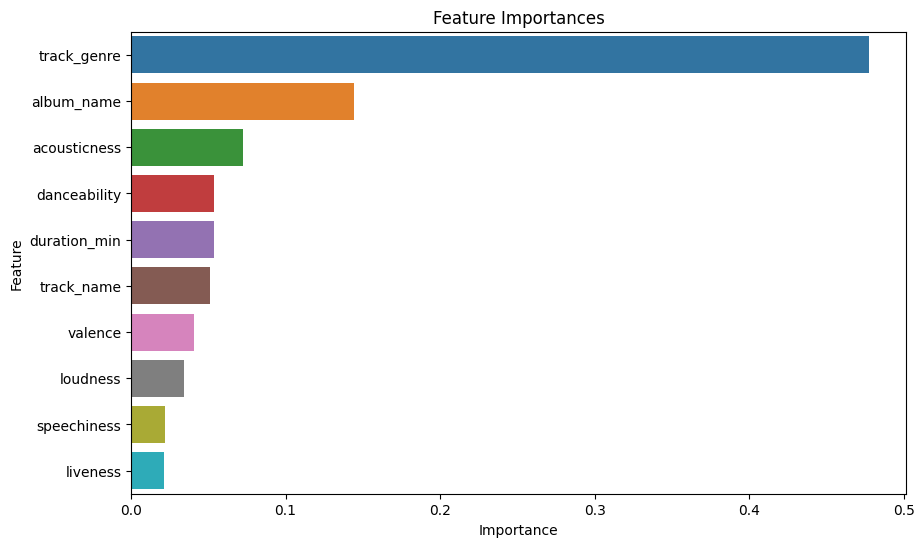

In [77]:
from sklearn.ensemble import RandomForestRegressor

# 1. Выделяем признаки и целевую переменную
X = data.drop(columns=['popularity'])  
y = data['popularity']  

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Построение модели RandomForest
model = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 4. Оценка важности признаков
importances = model.feature_importances_
feature_names = X.columns  # Получаем имена признаков

# 5. Создание DataFrame для важности признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 6. Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 7. Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Feature Importances')
plt.show()

В результате нахождения Feature importance определили, что жанр трека является довольно важным признаком.


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}") # Коэффициент детерминации, который указывает, насколько хорошо модель объясняет изменчивость целевой переменной.


Оценка модели:
MAE (Mean Absolute Error): 0.66
MSE (Mean Squared Error): 0.72
R^2 (R-squared): 0.28



**3. Линейные модели, деревья, модификации градиентного бустинга, нейронные сети.**
.

Линейная модель


In [80]:
X = data.drop(columns=['popularity'])
y = data['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Обучение модели на наших обучающих данных
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}")


Оценка модели:
MAE (Mean Absolute Error): 0.84
MSE (Mean Squared Error): 0.99
R^2 (R-squared): 0.02


In [83]:
# кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Среднее значение кросс-валидации:", scores.mean())

Среднее значение кросс-валидации: 0.01610307926498209


Деревья решений


In [84]:
model = DecisionTreeRegressor()

# Определение параметров для перебора
param_grid = {
    "max_depth": [None, 5, 10, 14],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 3, 5]
}

# Настройка GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучение модели с перебором гиперпараметров
grid_search.fit(X_train, y_train)

# Получение лучших параметров и результатов
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший MSE (среднеквадратичная ошибка):", best_score)

Лучшие параметры: {'max_depth': 14, 'min_samples_leaf': 5, 'min_samples_split': 8}
Лучший MSE (среднеквадратичная ошибка): 0.746923524818297


In [85]:
reg = DecisionTreeRegressor(max_depth = 14, min_samples_split = 2, min_samples_leaf = 5)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}") # Коэффициент детерминации


Оценка модели:
MAE (Mean Absolute Error): 0.64
MSE (Mean Squared Error): 0.75
R^2 (R-squared): 0.25


In [86]:
# кросс-валидация
scores = cross_val_score(reg, X_train, y_train, cv=5)
print("Среднее значение кросс-валидации:", scores.mean())

Среднее значение кросс-валидации: 0.2517535515343047


Градиентный бустинг


In [87]:

reg = GradientBoostingRegressor(max_depth=8, n_estimators=200, learning_rate=0.1)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}") # Коэффициент детерминации\


Оценка модели:
MAE (Mean Absolute Error): 0.49
MSE (Mean Squared Error): 0.43
R^2 (R-squared): 0.58


In [88]:
scores = cross_val_score(reg, X_train, y_train, cv=5)
print("Среднее значение кросс-валидации:", scores.mean())

Среднее значение кросс-валидации: 0.5714091748999697


Нейронные сети


In [89]:
reg = MLPRegressor(hidden_layer_sizes=(300, 200, 100), random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}") # Коэффициент детерминации


Оценка модели:
MAE (Mean Absolute Error): 1.00
MSE (Mean Squared Error): 1.59
R^2 (R-squared): -0.58


In [ ]:
scores = cross_val_score(reg, X_train, y_train, cv=5)
print("Среднее значение кросс-валидации:", -scores.mean())

Кросс-валидация показала, что наилучший результат (score = 3.52) получен с использованием нейронных сетей, однако аномально высокие значения других метрик указывают на возможные проблемы с настройкой гиперпараметров. Градиентный бустинг продемонстрировал второй по величине score (0.57), что делает его предпочтительным методом для предсказания популярности в данном датасете. Линейная модель показала наихудшие результаты, подтверждая наличие нелинейных зависимостей в данных.